In [55]:
import re, string 
import pandas as pd   
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
%matplotlib inline
from matplotlib import pyplot as plt

!pip install hazm
import pandas as pd
from __future__ import unicode_literals
from hazm import *
import re
import numpy as np


In [56]:
def acronyms(txt):
  normalizer = Normalizer()
  txt=normalizer.normalize(txt)
  txt = re.sub(r"[A-Za-z«»,:;</()\[\d+>]", "", txt)
  #print(txt)
  matches = re.findall("([\s]([آابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهیئ۱۲۳۴۵۶۷۸۹۰| ]{1,6}\.){2,4})", txt)
  for macth in matches:
  #  print(macth[0])
    y= macth[0]
    z= y.replace('. ', '\u200c')
    z= z.replace('.', '')
  #  print(z)
    txt = txt.replace(y, z)
  #  print(txt)

  return txt

In [57]:


linesnew = []
output = open('voa_fa.txt', "w", encoding = "utf-8", errors='ignore') 
with open("/content/drive/MyDrive/voa_fa_2003-2008_orig.txt", "r", encoding = "utf-8", errors='ignore') as f:
    line = f.readline()
    while line:
     
        line = f.readline()
        line=acronyms(line)
        linesnew.append(line)
        output.write(line)


output.close()

In [58]:

stopword=[]

df = pd.read_csv('/content/drive/MyDrive/stopword.txt', engine='python', encoding='utf-8',error_bad_lines=False) 
stopword = df['WORD'].values.tolist()  
print(stopword)

['!', '#', '(', ')', '*', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟', 'آباد', 'آخ', 'آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام', 'آرام آرام', 'آره', 'آری', 'آزادانه', 'آسان', 'آسیب پذیرند', 'آشنایند', 'آشکارا', 'آقا', 'آقای', 'آقایان', 'آمد', 'آمدن', 'آمده', 'آمرانه', 'آن', 'آن گاه', 'آنان', 'آنانی', 'آنجا', 'آنرا', 'آنطور', 'آنقدر', 'آنها', 'آنهاست', 'آنچنان', 'آنچنان که', 'اونجور', 'اونجوری', 'اونجوری که', 'آنچه', 'آنکه', 'آنگاه', 'آن\u200cها', 'آهان', 'آهای', 'آور', 'آورد', 'آوردن', 'آورده', 'آوه', 'آی', 'آیا', 'آید', 'آیند', 'ا', 'اتفاقا', 'اثرِ', 'اجراست', 'احتراما', 'احتمالا', 'احیاناً', 'اخیر', 'اخیراً', 'اری', 'از', 'از آن پس', 'از بس که', 'از جمله', 'ازاین رو', 'ازجمله', 'ازش', 'اساسا', 'اساساً', 'است', 'استفاد', 'استفاده', 'اسلامی اند', 'اش', 'اشتباها', 'اشکارا', 'اصلا', 'اصلاً', 'اصولا', 'اصولاً', 'اعلام', 'اغلب', 'افزود', 'افسوس', 'اقل', 'اقلیت', 'الا', 'الان', 'البته', 'البتّه', 'الهی', 'الی', 'ام', 'اما', 'امروز', 'امروزه', 'امسال', 'امشب', 'امور', 'امیدوارم', 'ام

Skipping line 7: Expected 1 fields in line 7, saw 2


In [59]:
from __future__ import unicode_literals
from hazm import *
normalizer = Normalizer()


In [60]:
vocabulary = []

for sentence in linesnew:
  sentence=normalizer.normalize(sentence)
  vocabulary.append(word_tokenize(sentence))
 
for voc in vocabulary:
  if voc in stopword:
    print(voc)
    vocabulary.remove(voc)


vocabulary_size = len(vocabulary)

In [61]:
print(vocabulary[3:10])

[['در', 'یکی', 'از', 'این', 'گزارشها', '،', 'که', 'از', 'سوی', 'خبرگزاری', 'کیودو', '،', 'انتشار', 'یافته', '،', 'گفته_شده_است', 'که', 'دو', 'کشور', 'برای', 'رفع', 'اختلافات', 'دیرین', 'خود', 'بر', 'سر', 'چهار', 'جزیره', 'از', 'جزایر', 'زنجیره\u200cای', 'کوریل', '،', 'بر', 'اساس', 'سه', 'پیمان', 'گذشته', 'خود', 'عمل', 'خواهند_کرد', '.', 'بموجب', 'یکی', 'از', 'این', 'پیمانها', 'که', 'در', 'سال', 'امضاء', 'شده', '،', 'دو', 'تا', 'از', 'این', 'جزیره\u200cها', 'پس', 'از', 'امضاء', 'یک', 'پیمان', 'صلح', 'به', 'ژاپن', 'پس', 'داده_خواهد_شد', '.', 'اما', 'بموجب', 'پیمانی', 'که', 'در', 'سال', 'به', 'امضاء', 'رسیده', '،', 'مسئله', 'حاکمیت', 'این', 'چهار', 'جزیره', 'بایستی', 'پیش', 'از', 'امضاء', 'پیمان', 'صلح', 'فیصله', 'یابد', '.', 'هیچ', 'یک', 'از', 'دو', 'طرف', 'نحوه', 'استفاده', 'از', 'پیمان\u200cهای', 'پیشین', 'را', 'اعلام', 'نکرده\u200cاند', '.'], ['#', '\u200c', '------', '.', '?', '='], ['#', '--'], ['#', 'تشکیلات', 'فلسطینی', 'نخستین', 'بودجه', 'رسمی', 'خود', 'را', 'اعلام', 'کرد'], ['تش

In [62]:
w2v_model = Word2Vec(min_count=200,
                     window=5,
                     size=100,
                     workers=5)
                     
w2v_model.build_vocab(vocabulary)
w2v_model.train(vocabulary, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
w2v_model.init_sims(replace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


In [63]:
w2v_model.wv.most_similar(positive=['شنبه'])

[('چهارشنبه', 0.7904788255691528),
 ('پنجشنبه', 0.7550599575042725),
 ('دوشنبه', 0.744828462600708),
 ('جمعه', 0.7151482105255127),
 ('یکشنبه', 0.6952825784683228),
 ('روزه', 0.4972781240940094),
 ('امروز', 0.4734364151954651),
 ('دیروز', 0.4346770644187927),
 ('دومین', 0.3803483843803406),
 ('ظرف', 0.37046366930007935)]

In [64]:

w2v_model.wv.most_similar(positive=['کشور'])


[('منطقه', 0.44566649198532104),
 ('آفریقا', 0.3731525242328644),
 ('داخلی', 0.3579653203487396),
 ('کشورهای', 0.34486985206604004),
 ('طرف', 0.33076679706573486),
 ('طی', 0.3277556896209717),
 ('افغانستان', 0.31633082032203674),
 ('لیبریه', 0.31537097692489624),
 ('روزه', 0.3112412393093109),
 ('اجلاس', 0.3067660331726074)]

In [65]:

w2v_model.wv.most_similar(positive=['ژاپن'])


[('چین', 0.718692421913147),
 ('استرالیا', 0.6570650339126587),
 ('کانادا', 0.6438128352165222),
 ('تایلند', 0.5924496650695801),
 ('روسیه', 0.5824512243270874),
 ('تایوان', 0.5619556307792664),
 ('پکن', 0.5157284736633301),
 ('ایتالیا', 0.5114482641220093),
 ('فرانسه', 0.4881841838359833),
 ('تیم', 0.4819236397743225)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


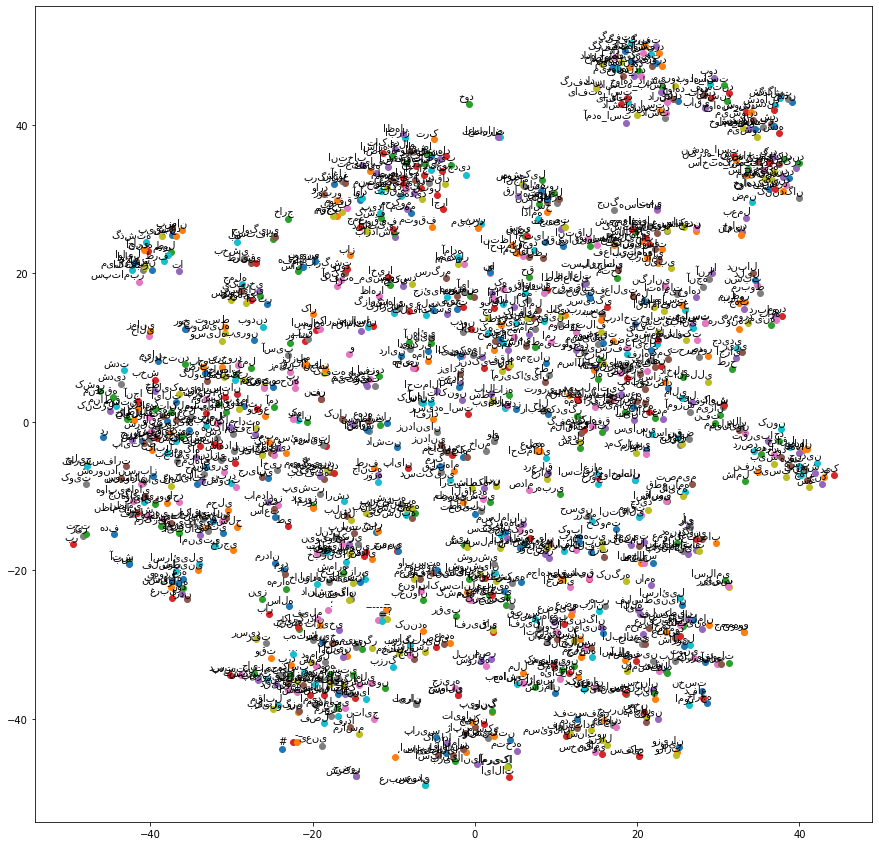

In [66]:
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 15)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
   
tsne_plot(w2v_model)